# WeatherPy
Observable Trend 1: Cities near the poles (-90 and 90 Latitude) have the coldest temperatures, and the temperature gets higher as you approach the equator (0 Latitude).

Observable Trend 2: Cities at all different levels of latitude exhibit different levels of cloudiness.

Observable Trend 3: Cities at all different levels of latitiude exhibit high percentage levels of humidity.

In [22]:
import json
import requests
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key

In [23]:
#Test Citipy

from citipy import citipy

In [24]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = base_url + "appid=" + api_key + "&units=imperial" + "&q="

# Generate Cities List

In [25]:
cities = []

city_count = 600

x_axis = np.arange(0, city_count, 1)


lats = [random.randrange(-90,90) for value in x_axis]
lons = [random.randrange(-180, 180) for value in x_axis]
    

for x, y in zip(lats, lons):
    response = requests.get(query_url + str(citipy.nearest_city(x, y))).json()
    cities.append(citipy.nearest_city(x, y).city_name.replace(" ", "+"))


# Perform API Calls

In [32]:
city_name = []
lat = []
long =[]
temp = []
humidity = []
cloudiness = []
wind_speed = []
time = []
country = []

for city in cities:
    try:
        response = requests.get((query_url + city).replace(" ", "+")).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        time.append((response['dt']))
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        #print("Processing Record " + str(cities.index(city) + 1) + " of 600 | " + city)
        #print(query_url + city)
    except KeyError:
        pass
print(f"Total Amount of Cities: {len(lat)}")
print("-"*30)
print("Data Retrieval Complete")
print("-"*30)

Total Amount of Cities: 562
------------------------------
Data Retrieval Complete
------------------------------


In [33]:
city_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": time,
    "Humidity": humidity,
    "Lat": lat,
    "Long": long,
    "Temperature": temp,
    "Wind Speed": wind_speed   
}

city_data = pd.DataFrame(city_dict)

city_data.to_csv("city_data.csv", encoding="utf-8", index=False)

# Latitude vs. Temperature Plot

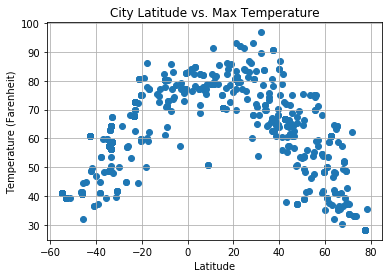

In [34]:
#Temp v. Latitude
plt.scatter(city_dict["Lat"], city_dict["Temperature"], marker="o")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig1.png")
plt.show()


# Latitude vs. Humidity Plot

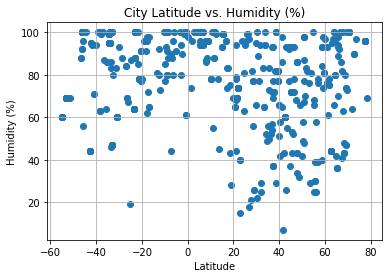

In [35]:
#Humidity (%) vs. Latitude

plt.scatter(city_dict["Lat"], city_dict["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig2.png")
plt.show()

# Latitude vs. Cloudiness Plot

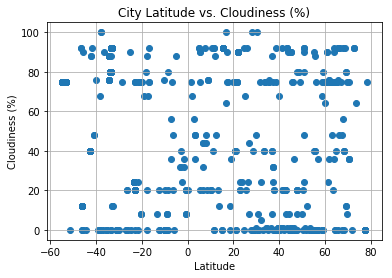

In [36]:
#Cloudiness (%) vs. Latitude

plt.scatter(city_dict["Lat"], city_dict["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig3.png")
plt.show()

# Latitude vs. Wind Speed Plot

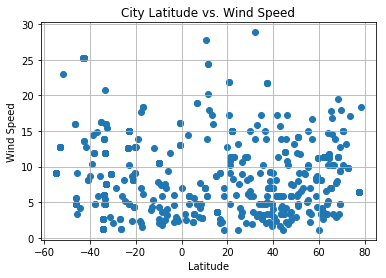

In [37]:
#Wind Speed (mph) vs. Latitude

plt.scatter(city_dict["Lat"], city_dict["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig4.png")
plt.show()